In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
from datetime import timedelta
import plotly.express as px
import matplotlib as mpl
from fbprophet import Prophet
from dateutil.relativedelta import relativedelta
from fredapi import Fred

In [2]:
# Set up Fred object with FRED API key
fred_key = 'b2e2ce0707e5200f8e4ed4e725d5a257'
fred = Fred(api_key=fred_key)

In [3]:
# Search FRED for "mortgage rate" data and output results to dataframe
fred_df = fred.search('mortgage rate')

In [4]:
fred_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
MORTGAGE30US,MORTGAGE30US,2023-10-01,2023-10-01,30-Year Fixed Rate Mortgage Average in the Uni...,1971-04-02,2023-09-28,"Weekly, Ending Thursday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-09-28 11:06:02-05:00,99,"On November 17, 2022, Freddie Mac changed the ..."
MORTGAGE15US,MORTGAGE15US,2023-10-01,2023-10-01,15-Year Fixed Rate Mortgage Average in the Uni...,1991-08-30,2023-09-28,"Weekly, Ending Thursday",W,Percent,%,Not Seasonally Adjusted,NSA,2023-09-28 11:06:05-05:00,72,"On November 17, 2022, Freddie Mac changed the ..."
DRSFRMACBS,DRSFRMACBS,2023-10-01,2023-10-01,Delinquency Rate on Single-Family Residential ...,1991-01-01,2023-04-01,"Quarterly, End of Period",Q,Percent,%,Seasonally Adjusted,SA,2023-08-21 13:48:03-05:00,77,None
OBMMIJUMBO30YF,OBMMIJUMBO30YF,2023-10-01,2023-10-01,30-Year Fixed Rate Jumbo Mortgage Index,2017-01-03,2023-09-28,Daily,D,Percent,%,Not Seasonally Adjusted,NSA,2023-09-29 07:01:06-05:00,66,Optimal Blue Mortgage Market Indices (https://...
DRSFRMACBN,DRSFRMACBN,2023-10-01,2023-10-01,Delinquency Rate on Single-Family Residential ...,1991-01-01,2023-04-01,"Quarterly, End of Period",Q,Percent,%,Not Seasonally Adjusted,NSA,2023-08-21 13:48:14-05:00,30,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BOGZ1FA113165405Q,BOGZ1FA113165405Q,2023-10-01,2023-10-01,Nonfinancial Noncorporate Business; Multifamil...,1946-10-01,2023-04-01,Quarterly,Q,Millions of Dollars,Mil. of $,Seasonally Adjusted Annual Rate,SAAR,2023-09-08 11:51:28-05:00,1,Source ID: FA113165405.Q For more information...
BOGZ1FA643063073Q,BOGZ1FA643063073Q,2023-10-01,2023-10-01,Mortgage Real Estate Investment Trusts; Corpor...,1946-10-01,2023-04-01,Quarterly,Q,Millions of Dollars,Mil. of $,Seasonally Adjusted Annual Rate,SAAR,2023-09-08 11:50:40-05:00,1,Source ID: FA643063073.Q For more information...
BOGZ1FA643063093Q,BOGZ1FA643063093Q,2023-10-01,2023-10-01,Mortgage Real Estate Investment Trusts; Corpor...,1946-10-01,2020-07-01,Quarterly,Q,Millions of Dollars,Mil. of $,Seasonally Adjusted,SA,2020-12-16 12:26:06-06:00,1,Source ID: FA643063093.Q For more information...


In [5]:
# Output titles to to list 
fred_title_list = fred_df['title'].to_list()
fred_title_list

['30-Year Fixed Rate Mortgage Average in the United States',
 '15-Year Fixed Rate Mortgage Average in the United States',
 'Delinquency Rate on Single-Family Residential Mortgages, Booked in Domestic Offices, All Commercial Banks',
 '30-Year Fixed Rate Jumbo Mortgage Index',
 'Delinquency Rate on Single-Family Residential Mortgages, Booked in Domestic Offices, All Commercial Banks',
 '5/1-Year Adjustable Rate Mortgage Average in the United States (DISCONTINUED)',
 '30-Year Fixed Rate Veterans Affairs Mortgage Index',
 '30-Year Fixed Rate FHA Mortgage Index',
 'Mortgage Delinquency Rates for United States',
 '30-Year Fixed Rate Conforming Mortgage Index',
 '30-Year Fixed Rate USDA Mortgage Index',
 'AD&Co US Mortgage High Yield Index, Credit-and-Option-Adjusted Spread: Mid-Tier',
 '30-Year Fixed Rate Conforming Mortgage Index: Loan-to-Value Greater Than 80, FICO Score Between 720 and 739',
 'Contract Rate on 30-Year, Fixed-Rate Conventional Home Mortgage Commitments (DISCONTINUED)',
 'C

In [6]:
# Output series id of 30-year fixed rate US mortgage averages 
fred_df[fred_df['title'] == '30-Year Fixed Rate Mortgage Average in the United States'].index

Index(['MORTGAGE30US'], dtype='object', name='series id')

In [7]:
# Get 30-year mortgage rate data from Fred using get_series and series id
fred_mortgage_series = fred.get_series(series_id='MORTGAGE30US')

In [8]:
fred_mortgage_series

1971-04-02    7.33
1971-04-09    7.31
1971-04-16    7.31
1971-04-23    7.31
1971-04-30    7.29
              ... 
2023-08-31    7.18
2023-09-07    7.12
2023-09-14    7.18
2023-09-21    7.19
2023-09-28    7.31
Length: 2740, dtype: float64

<AxesSubplot:title={'center':'30-Year Fixed Rate Mortgage Average in the United States 1971-Present'}>

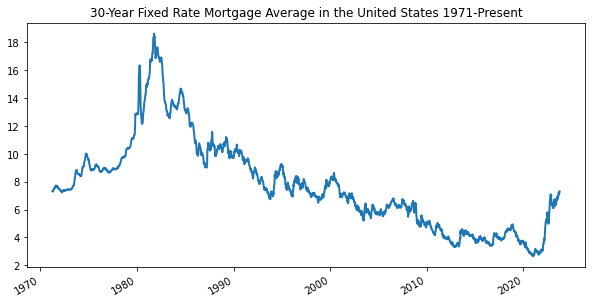

In [9]:
# Plot 30-year mortgage data
fred_mortgage_series.plot(
    figsize=(10, 5), 
    title='30-Year Fixed Rate Mortgage Average in the United States 1971-Present', 
    lw=2
)

In [10]:
# Set cutoff date to 20 years ago
cutoff_date = date.today()-relativedelta(years=20)
cutoff_date = cutoff_date.strftime("%Y-%m-%d")

In [11]:
# Convert series to dataframe, rename columns and use cutoff date to filter data
fred_mortgage_df = fred_mortgage_series.to_frame().reset_index()
fred_mortgage_df = fred_mortgage_df.rename(columns={'index': 'date', 0: 'mortgage_rate'})
fred_mortgage_df = fred_mortgage_df[fred_mortgage_df['date'] >= (cutoff_date)]
fred_mortgage_df

,date,mortgage_rate
1696,2003-10-03,5.77
1697,2003-10-10,5.95
1698,2003-10-17,6.05
1699,2003-10-24,6.05
1700,2003-10-31,5.94
...,...,...
2735,2023-08-31,7.18
2736,2023-09-07,7.12
2737,2023-09-14,7.18
2738,2023-09-21,7.19


In [12]:
# Set variable/column names
column_1 = 'date'
column_2 = 'mortgage_rate'

# Set timeseries unit
increment = 'D'

# Set rain-test split date
train_test_split_date = '2020-01-01'

# Set changepoint
changepoint = 0.95

In [13]:
# Set figure and axes parameters
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [14]:
# Copy dataframe to new dataframe
df = fred_mortgage_df

In [15]:
df

,date,mortgage_rate
1696,2003-10-03,5.77
1697,2003-10-10,5.95
1698,2003-10-17,6.05
1699,2003-10-24,6.05
1700,2003-10-31,5.94
...,...,...
2735,2023-08-31,7.18
2736,2023-09-07,7.12
2737,2023-09-14,7.18
2738,2023-09-21,7.19


In [16]:
# Convert column 1 to datetime
df[column_1] = pd.to_datetime(df[column_1])
df

,date,mortgage_rate
1696,2003-10-03,5.77
1697,2003-10-10,5.95
1698,2003-10-17,6.05
1699,2003-10-24,6.05
1700,2003-10-31,5.94
...,...,...
2735,2023-08-31,7.18
2736,2023-09-07,7.12
2737,2023-09-14,7.18
2738,2023-09-21,7.19


In [30]:
# Plot data
fig = px.line(
    df.reset_index(), 
    x=column_1, 
    y=column_2, 
    title='30-Year Fixed Rate Mortgage Average in the United States (Last 20 Years)',
    labels={
        column_1: "Date",
        column_2: "Mortgage Rate"
    },
)

# Set up plot view-slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='2y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward")
        ])
    )
)

fig.show()

In [18]:
# Copy dataframe to new dataframe with renamed columns
df2 = df.reset_index()[[column_1, column_2]].rename({column_1: 'ds', column_2: 'y'}, axis='columns')

df2

,ds,y
0,2003-10-03,5.77
1,2003-10-10,5.95
2,2003-10-17,6.05
3,2003-10-24,6.05
4,2003-10-31,5.94
...,...,...
1039,2023-08-31,7.18
1040,2023-09-07,7.12
1041,2023-09-14,7.18
1042,2023-09-21,7.19


In [19]:
# Create training data dataframe and testing data dataframe
train = df2[(df2['ds'] <= train_test_split_date)]
test = df2[(df2['ds'] > train_test_split_date)]

test

,ds,y
848,2020-01-02,3.72
849,2020-01-09,3.64
850,2020-01-16,3.65
851,2020-01-23,3.60
852,2020-01-30,3.51
...,...,...
1039,2023-08-31,7.18
1040,2023-09-07,7.12
1041,2023-09-14,7.18
1042,2023-09-21,7.19


In [20]:
# Create Prophet model and set changepoint range
m = Prophet(changepoint_range=changepoint)

# Fit model to training data dataframe
m.fit(train)

m

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
# Set periods equal to difference between testing date dateframe start date and end date
f_date = test['ds'].iloc[0]
l_date = test['ds'].iloc[-1]
delta = l_date - f_date
periods = delta.days
print(periods)

1365


In [22]:
# Generate 'future' dates for the model to use a number of periods beyond training data end date
future = m.make_future_dataframe(periods=periods, freq=increment)

future

,ds
0,2003-10-03
1,2003-10-10
2,2003-10-17
3,2003-10-24
4,2003-10-31
...,...
2208,2023-09-17
2209,2023-09-18
2210,2023-09-19
2211,2023-09-20


In [23]:
# Use model to generate predictions with lower and upper bounds for 'future' dates.
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2208,2023-09-17,1.960380,0.669303,3.116576
2209,2023-09-18,1.956069,0.692705,3.118903
2210,2023-09-19,1.951879,0.727306,3.178659
2211,2023-09-20,1.755984,0.524386,2.949150
2212,2023-09-21,1.829943,0.613064,3.053742


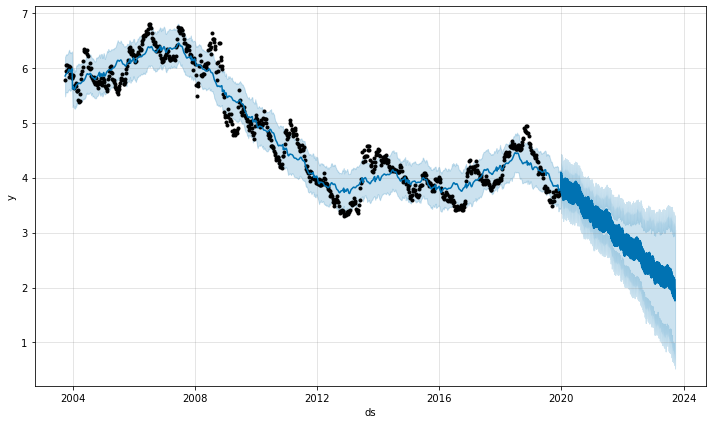

In [24]:
# Concatenate dataframe with renamed columns and forecasted data
result = pd.concat([df2.set_index('ds')['y'], forecast.set_index('ds')[['yhat','yhat_lower','yhat_upper']]], axis=1)
result

# Plot forecasted data with trainining data and model projections
fig1 = m.plot(forecast)

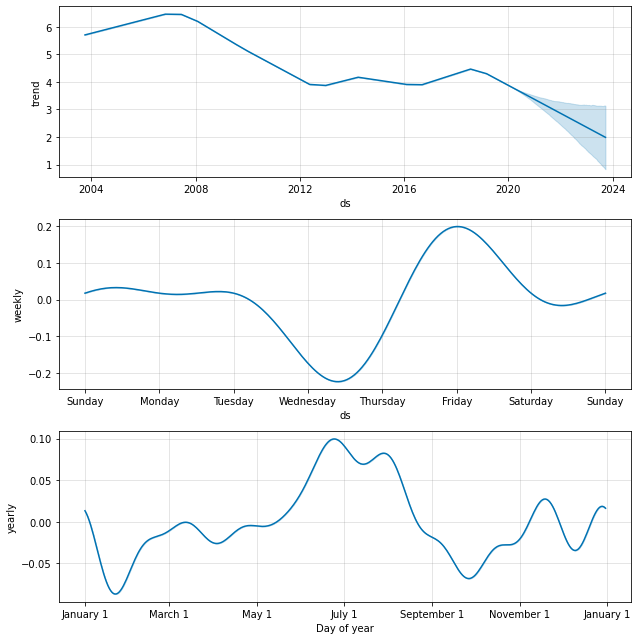

In [25]:
# Plot weekly, yearly and overall trends
comp = m.plot_components(forecast)

In [26]:
# Create columns with calculations for 'error' and 'uncertainty'
result['error'] = result['y'] - result['yhat']
result['uncertainty'] = result['yhat_upper'] - result['yhat_lower']

result

,y,yhat,yhat_lower,yhat_upper,error,uncertainty
ds,,,,,,
2003-10-03,5.77,5.850445,5.479737,6.199901,-0.080445,0.720165
2003-10-10,5.95,5.873672,5.555361,6.229328,0.076328,0.673967
2003-10-17,6.05,5.891044,5.557977,6.247300,0.158956,0.689323
2003-10-24,6.05,5.897619,5.552123,6.232277,0.152381,0.680154
2003-10-31,5.94,5.906498,5.552455,6.255269,0.033502,0.702814
...,...,...,...,...,...,...
2023-09-18,NaN,1.956069,0.692705,3.118903,NaN,2.426199
2023-09-19,NaN,1.951879,0.727306,3.178659,NaN,2.451352
2023-09-20,NaN,1.755984,0.524386,2.949150,NaN,2.424764


In [27]:
# Create column and definition for 'anomaly'
result['anomaly'] = result.apply(lambda x: 'Yes' if(np.abs(x['error']) > 1.5*x['uncertainty']) else 'No', axis = 1)

result

,y,yhat,yhat_lower,yhat_upper,error,uncertainty,anomaly
ds,,,,,,,
2003-10-03,5.77,5.850445,5.479737,6.199901,-0.080445,0.720165,No
2003-10-10,5.95,5.873672,5.555361,6.229328,0.076328,0.673967,No
2003-10-17,6.05,5.891044,5.557977,6.247300,0.158956,0.689323,No
2003-10-24,6.05,5.897619,5.552123,6.232277,0.152381,0.680154,No
2003-10-31,5.94,5.906498,5.552455,6.255269,0.033502,0.702814,No
...,...,...,...,...,...,...,...
2023-09-18,NaN,1.956069,0.692705,3.118903,NaN,2.426199,No
2023-09-19,NaN,1.951879,0.727306,3.178659,NaN,2.451352,No
2023-09-20,NaN,1.755984,0.524386,2.949150,NaN,2.424764,No


In [28]:
# Plot result data while highlighting anomalies
fig = px.scatter(
    result.reset_index(), 
    x='ds', 
    y='y', 
    color='anomaly', 
    title='30-Year Fixed Rate Mortgage Average in the United States (Last 20 Years)')

# Set up plot view-slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='3y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()

In [29]:
# Plot result data while highlighting anomalies
fig = px.scatter(
    result.reset_index(), 
    x='ds', 
    y='y', 
    color='anomaly', 
    title='30-Year Fixed Rate Mortgage Average in the United States (Last 20 Years)',
    labels={
        "ds": "Date",
        "y": "Mortgage Rate",
        "anomaly": "Anomaly Detection"
    },
)

# Set up plot view-slider
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector = dict(
        buttons = list([
              dict(count=1, label='1y', step="year", stepmode="backward"),
              dict(count=2, label='3y', step="year", stepmode="backward"),
              dict(count=2, label='5y', step="year", stepmode="backward"),
              dict(step="all")
        ])
    )
)
fig.show()